<a href="https://colab.research.google.com/github/muscak/Car-Price-Prediction/blob/main/Car_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical Example: Car Sales
The purpose of this study is to learn about linear regression using Scikit-Learn package. It's mainly based on the data and code of "The Data Science Course 2022: Complete Data Science Bootcamp" in Udemy. <br>
It's going to be a real life example about car sales. Data is messy so we need to
1. Clean the dataset
2. Go through some assumptions and relax some of them
3. Practice log transformation
4. Create a model
5. Create dummy variables to handle categorical features

What we would like to do is predict the price of a used car depending on it's specifications.

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb
sb.set(style="whitegrid")

# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

In [2]:
drive.mount('/content/gdrive') # While working on local computer no need for this function. 

Mounted at /content/gdrive


##Load the raw data

In [3]:
# Special function to read and parse a .csv file and parse it. To see the structure type: pd.read_csv?
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Linear Regression/Data/Car_Sales.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


This is a list of second hand cars with their
- respective price
- type of body
- milage
- engine volume
- engine type
- year of production
- model
- information about when they were registered


##Preprocessing

###Exploring the descriptive statistics of the variables

In [4]:
# Including descriptives for categorical features too
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


1. Each feature has different number of observations. Therefore there are some missing values.
2. There are 312 unique enteries for 'Model'. It's hard to implement at a regression since we must deal with 300 dummies. A lot of information from 'Model' could be engineered from 'Brand', 'Year' and 'EnginV'. So it' will be <ins>removed</ins>.
3. We have most common category (`top`) and it's frequency (`freq`). Registration has 3947 'yes' entiries. This feature might not be useful.

###Determining the features of interest

In [5]:
data = df.drop(['Model'], axis='columns')
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


###Dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Price and EngineV are the only features with missing values.

**Rule of thumb:** If you are removing less than 5% of the observations, you are free to just remove all that missing values. 

In [7]:
data_no_mv = data.dropna(axis='rows')

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


###Exploring Probability Distributions Functions (PDFs)

For optimal results we'd be looking for normal distributions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


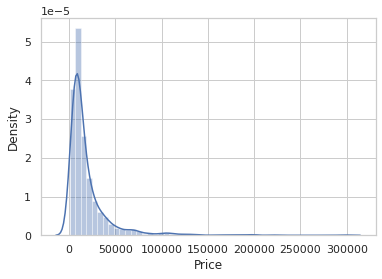

In [9]:
sb.distplot(data_no_mv['Price'])

Above graph shows the outliers of 'Price'. Outliers are observations that lie on abnormal distance from other observations in the dataset. They will affect the regression dramatically and cost coefficient to be inflated as regressison will try to place the line closer to those values. One way to deal with them seamlessly is to remove the top 1% of observations.

####Dealing with outliers

In [10]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


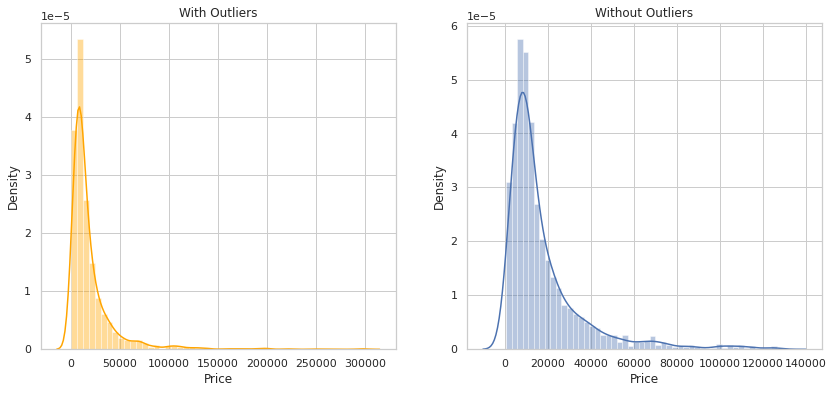

In [11]:
#Let's compare the PDFs side by side
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
sb.distplot(data_no_mv['Price'], color='orange')
ax1.set_title('With Outliers')

ax2 = fig.add_subplot(1, 2, 2)
sb.distplot(data_1['Price'])
ax2.set_title('Without Outliers')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


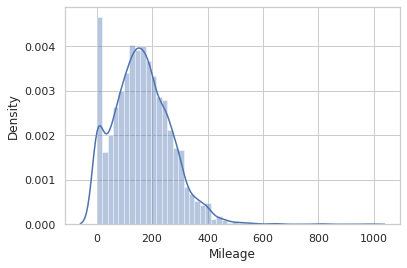

In [12]:
sb.distplot(data_no_mv['Mileage'])

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_no_mv['Mileage'] < q]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


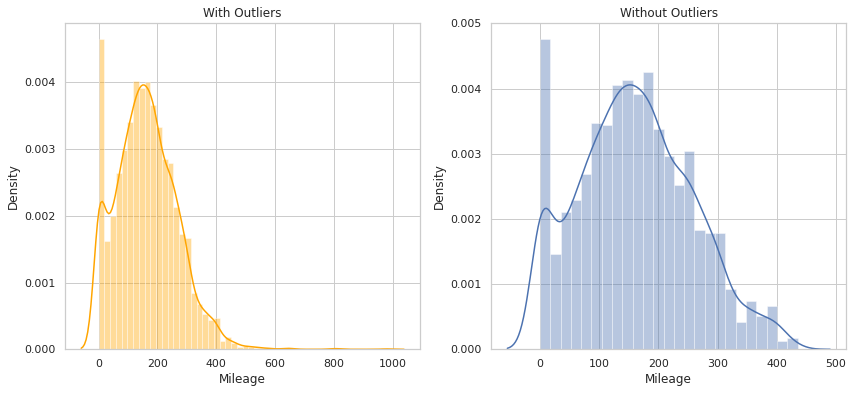

In [14]:
#Let's compare the PDFs side by side
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
sb.distplot(data_no_mv['Mileage'], color='orange')
ax1.set_title('With Outliers')

ax2 = fig.add_subplot(1, 2, 2)
sb.distplot(data_2['Mileage'])
ax2.set_title('Without Outliers')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


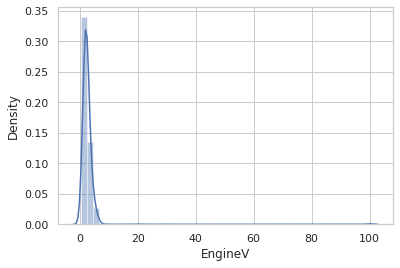

In [15]:
sb.distplot(data_no_mv['EngineV'])

In [16]:
data_no_mv['EngineV'].sort_values(ascending=False)

256     99.99
2349    99.99
3114    99.99
930     99.99
1311    99.99
        ...  
2769     1.00
2214     1.00
2801     1.00
188      0.65
2512     0.60
Name: EngineV, Length: 4025, dtype: float64

It has strange values such as 99.99.  As per [this article](https://en.wikipedia.org/wiki/Engine_displacement), a car engine can be between 0.6 and 6.5. That's why it's better to remove all engine volumes less than 6.5.

In [17]:
data_3 = data_2[data_no_mv['EngineV'] < 6.5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


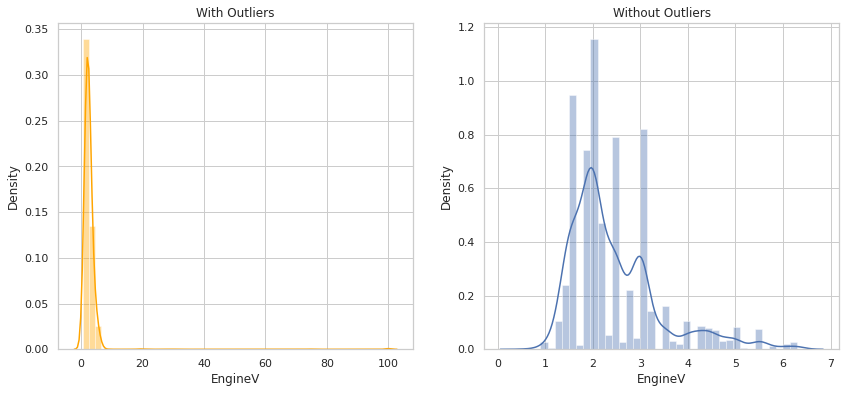

In [18]:
#Let's compare the PDFs side by side
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
sb.distplot(data_no_mv['EngineV'], color='orange')
ax1.set_title('With Outliers')

ax2 = fig.add_subplot(1, 2, 2)
sb.distplot(data_3['EngineV'])
ax2.set_title('Without Outliers')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


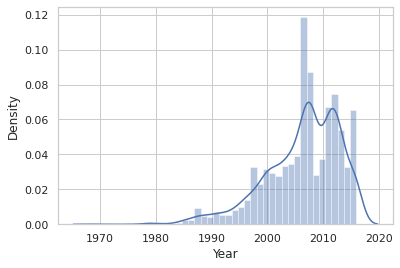

In [19]:
sb.distplot(data_no_mv['Year'])

In [20]:
# As per the above, the outliers are on the left side of the graph
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


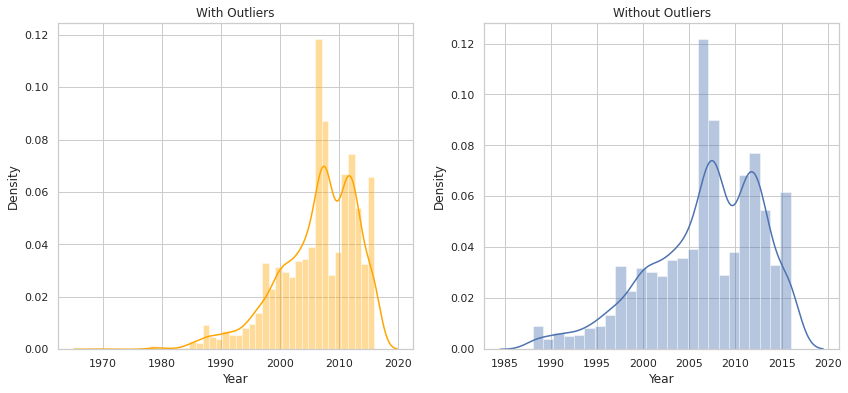

In [21]:
#Let's compare the PDFs side by side
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
sb.distplot(data_no_mv['Year'], color='orange')
ax1.set_title('With Outliers')

ax2 = fig.add_subplot(1, 2, 2)
sb.distplot(data_4['Year'])
ax2.set_title('Without Outliers')

plt.show()

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


##Checking the OLS Assumptions

We'll check only continous features not the categorical ones.

###Linearity

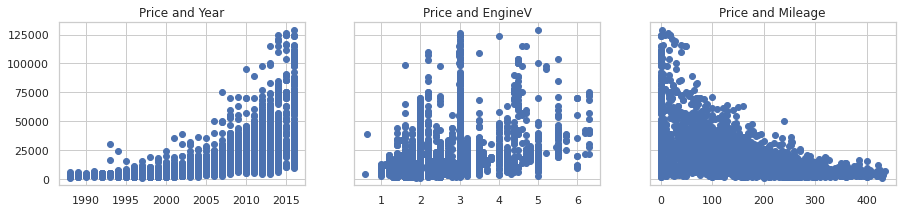

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

As seen on the above image, the pattern is not linear so we shouldn't run a linear regression in this case. First, we should transform one or more variabels.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


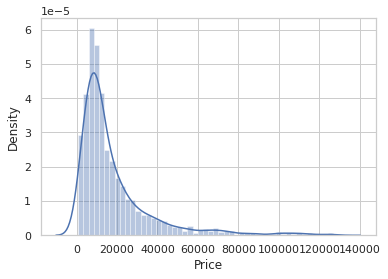

In [25]:
sb.distplot(data_cleaned['Price'])

It seems Price is not normally distributed and from there, it's relationship with the rest rather normally distributed features is not linear. The patterns are exponential. 

Log transformation is a common way to deal with this issue especially when facing exponential relationships.

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

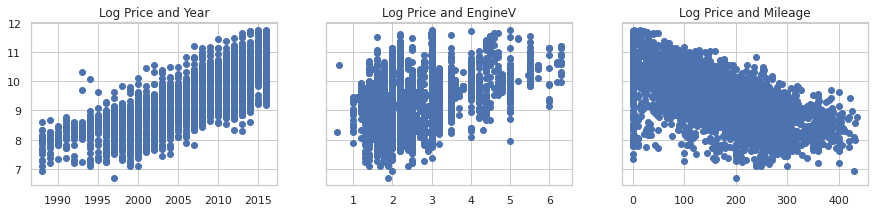

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [28]:
# We don't need original Price value anymore.
data_cleaned = data_cleaned.drop(['Price'], axis='columns')
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


###Multicollinearity

It's logical that Year and Mileage are going to be correlated. The newer the car the lower it's mileage. That's shy we should expect some degree of multicollinearity in the dataset. 
One of the best ways to check multicollinearity is Variance Inflation Factor (VIF) which produces a measure that estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


$VIF \in [1, +inf)$

VIF = 1: no multicollinearity

1 < VIF < 5: perfectly ok

Unfortunately, there is no firm decision on the cut off line. It could be 5, 6 of 10.

For our example Year is too correlated with the other variable and should be dropped from the dataset. 

In [31]:
# Dropping Year as explained above.
data_no_ml = data_cleaned.drop(['Year'], axis='columns')

##Create dummy variables

In [32]:
# Dropping the first not cause any multicollinearity 
data_with_dummies = pd.get_dummies(data_no_ml, drop_first=True)

In [33]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


##Creating the regression model

In [34]:
# Declare the inputs and the targets
y = data_with_dummies['log_price'] # target
x = data_with_dummies.drop(['log_price'], axis='columns') # inputs

###Scale the data

**Note:** It's not <ins>usually</ins> recommended to standard dummy variables. Scaling has no predictive power of dummies, once scaled, though, they loose all their dummy meaning. However, for now, we'll not handle them in a different way.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [36]:
scaled_x = scaler.transform(x)

###Train-Test Split 

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=365)

###Regression

In [38]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [39]:
y_hat = reg.predict(x_train)

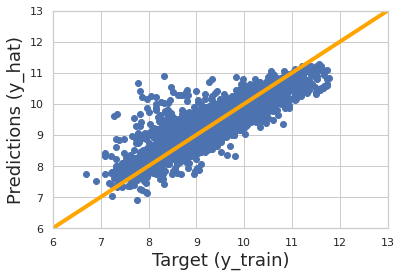

In [53]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
# To draw the best possible line. 
# The closer the scatter plot to this line, the better the model. 
x1 = np.arange(6, 14)
y1 =  x1
fig = plt.plot(x1, y1, lw=4, c='orange', label='Best Possible Regression Line')
plt.show()

Residual plot is another type of check the performance of the model.
Residual means difference between the target and the predictions, therefore, residuals are estimates of errors.
Residual plots refer to the the distributions of the residuals.

From the normality assumption, we know that the error should follow normal distribution with the mean of 0.

Below graph looks like normally distributed with a mean of 0. However, there is a much longer tail on the negative side. There are observations that y_train - y_hat is much lower than the mean. Therefore, a much higher price is predicted than the observed. These predictions tend to over estimate the target.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

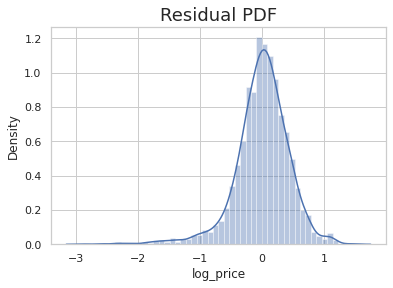

In [55]:
sb.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [56]:
reg.score(x_train, y_train)

0.744996578792662

In [57]:
reg.intercept_

9.415239458021299

In [58]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


As per the above table:
1. A positive weight shows that as a feature increases in value, so do the log_price and the 'Price' respectively.
2. A negative weight shows that as a feature increases in value, log_price and the 'Price' decrease.
3. A positive weight shows that the respective category of dummy variable (Brand) is more expensive than the bechmark (dropped dummy).

###Testing

In [59]:
y_hat_test = reg.predict(x_test)

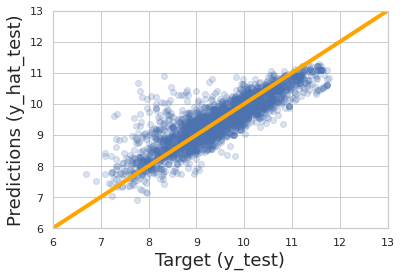

In [61]:
plt.scatter(y_train, y_hat, alpha=0.2) 
# We added alpha to show the proportional opacity of the points.
# The more saturated the colour, the higher the concentration of points.
# The paler the colour, the lower the concentration points.
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
# To draw the best possible line. 
# The closer the scatter plot to this line, the better the model. 
x1 = np.arange(6, 14)
y1 =  x1
fig = plt.plot(x1, y1, lw=4, c='orange', label='Best Possible Regression Line')
plt.show()

As can be seen on the above image, for higher prices, we have higher concentration of values around the 45 degree line. Our model is very good at predicting higher prices. It's not the same for lower prices.

In [64]:
# DataFrame Performance (df_pf)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions']) # np.exp to reverse the log transformation
df_pf['Targets'] = np.exp(y_test.reset_index(drop=True)) # Resetting index as the index of y_test is different than newly created data frame
df_pf.head()

,Predictions,Targets
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [65]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100)
df_pf.head()

,Predictions,Targets,Residuals,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [66]:
df_pf.describe()

,Predictions,Targets,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [67]:
pd.options.display.max_rows = 999 # Set the lenght of the rows to be displayed.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Targets,Residuals,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


At the bottom of the list, you may see there are some predictions that are far from the actual price. Residuals are negative for these predictions meaning that the predictions are higher than the targets. We might be missing an important factor which drives the price of the used car lower such as an accident or a failure.